Quantum number n (n = 1, 2, 3,...): 1
Quantum number l (l = 0, 1, 2,..., n-1): 0
Quantum number ml (ml = -l, -(l-1),..., (l-1), l): 0
1.00000000000000


/tmp/ipython-input-2974190230.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
  Φ[k] = azimuthal_wavefn(pt_Φ[k])


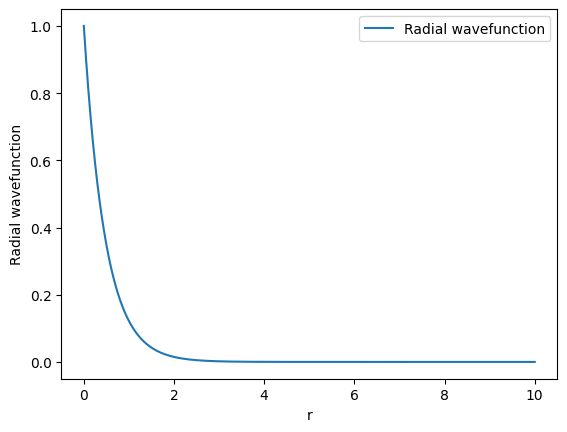

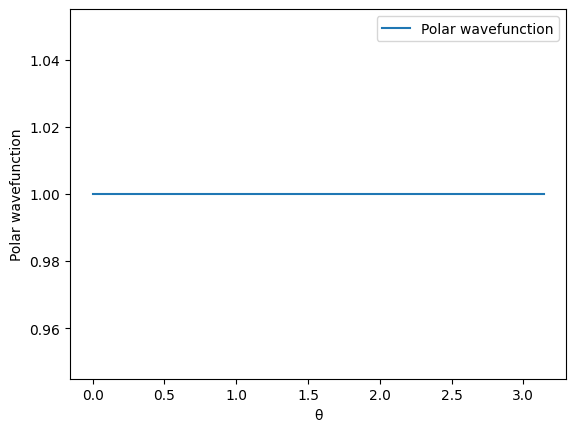

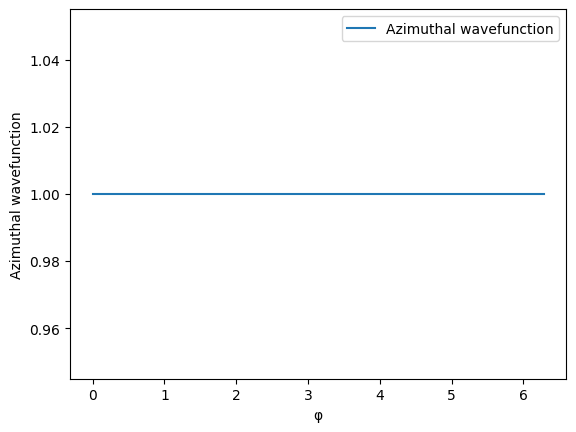

0 %
1 %
2 %
3 %
4 %
5 %
6 %
7 %
8 %
9 %
10 %
11 %
12 %
13 %
14 %
15 %
16 %
17 %
18 %
19 %
20 %
21 %
22 %
23 %
24 %
25 %
26 %
27 %
28 %
29 %
30 %
31 %
32 %
33 %
34 %
35 %
36 %
37 %
38 %
39 %
40 %
41 %
42 %
43 %
44 %
45 %
46 %
47 %
48 %
49 %
50 %
51 %
52 %
53 %
54 %
55 %
56 %
57 %
58 %
59 %
60 %
61 %
62 %
63 %
64 %
65 %
66 %
67 %
68 %
69 %
70 %
71 %
72 %
73 %
74 %
75 %
76 %
77 %
78 %
79 %
80 %
81 %
82 %
83 %
84 %
85 %
86 %
87 %
88 %
89 %
90 %
91 %
92 %
93 %
94 %
95 %
96 %
97 %
98 %
99 %
100 %


In [1]:
import mpmath
import numpy as np
from sympy import Symbol
import matplotlib.pyplot as plt

n = int(input('Quantum number n (n = 1, 2, 3,...): '))
l = int(input('Quantum number l (l = 0, 1, 2,..., n-1): '))
m = int(input('Quantum number ml (ml = -l, -(l-1),..., (l-1), l): '))

def azimuthal_wavefn(φ):
  Φ = np.exp(1j*complex(m)*complex(φ))
  return Φ

# Calculating polar polynomials just once:
if l == 0:
  pw_a = np.zeros(1)
  pw_a[0] = 1
else:
  pw_a = np.zeros(l+1)
  if l%2 == 0:
    pw_a[0] = 1; pw_a[1] = 0
  else:
    pw_a[0] = 0; pw_a[1] = 1
  for k in range(l-1):
    pw_a[k+2] = ((k*(k+1) - l*(l+1))/((k+2)*(k+1)))*pw_a[k]

pw_z = Symbol('pw_z')
pw_P = 0
for k in range(l+1):
  pw_P += pw_a[k]*(pw_z**k)
Pdiff = pw_P.diff(pw_z,np.abs(m))
print(Pdiff)
#===========================================

def polar_wavefn(θ):
  Θ = np.sin(θ)**np.abs(m) * Pdiff
  Θ = Θ.subs(pw_z,np.cos(θ))
  return Θ

# Calculating radial polynomials just once:
if n-l==1:
  rw_a = np.zeros(1)
  rw_a[0] = 1
else:
  rw_a = np.zeros(n-l+1)
  rw_a[0] = 1
  for k in range(n-l):
    rw_a[k+1] = ((k+l+1-n)/((k+l+1)*(k+l+2) - l*(l+1)))*rw_a[k]

mass = 9.109 * 10**(-31)
elec = 1.602 * 10**(-19)
hbar = 1.054 * 10**(-34)
rw_E = (mass * elec**4)/(2 * hbar**2 * n**2)

sqrt1 = np.sqrt(8*mass*rw_E)/hbar
sqrt2 = np.sqrt(2*mass*rw_E)/hbar
#===========================================

def radial_wavefn(r):
  R = 0.
  for k in range(n-l):
    R += rw_a[k] * (r*sqrt1)**(k+l)
  R = R * np.exp(-r*sqrt2)
  return R

# Graphing each component of the wavefunction individually (up to r=10 for R(r))
pt_R = np.linspace(0,10,201)
pt_Θ = np.linspace(0,np.pi,201)
pt_Φ = np.linspace(0,2*np.pi,201)
R = np.zeros(201); Θ = np.zeros(201); Φ = np.zeros(201)
for k in range(201):
  R[k] = radial_wavefn(pt_R[k])
  Θ[k] = polar_wavefn(pt_Θ[k])
  Φ[k] = azimuthal_wavefn(pt_Φ[k])
plt.plot(pt_R,R,label='Radial wavefunction'); plt.ylabel('Radial wavefunction'); plt.xlabel('r'); plt.legend(); plt.show()
plt.plot(pt_Θ,Θ,label='Polar wavefunction'); plt.ylabel('Polar wavefunction'); plt.xlabel('θ'); plt.legend(); plt.show()
plt.plot(pt_Φ,Φ,label='Azimuthal wavefunction'); plt.ylabel('Azimuthal wavefunction'); plt.xlabel('φ'); plt.legend(); plt.show()

# Want to graph wavefn in a 10x10x10 cube of resolution 101x101x101 centred on 0,0,0.
# For each point, need to convert cartesian coords to spherical and then calculate Ψ

def total_wavefn(r,θ,φ):
  Ψ = complex(radial_wavefn(r))*complex(polar_wavefn(θ))*azimuthal_wavefn(φ)
  return Ψ

def cart_to_sph(x,y,z):
  r = np.sqrt(x**2 + y**2 + z**2)
  θ = np.acos(z/r)
  φ = np.acos(x/np.sqrt(x**2 + y**2))
  return r,θ,φ

Ψ = np.zeros((101,101,101),dtype=complex) #~
for x in range(101): #~
  print(x,'%')
  for y in range(101): #~
    if x == 50 & y == 50: #~
      continue
    for z in range(101): #~
      r,θ,φ = cart_to_sph(((x/10) - 5),((y/10) - 5),((z/10) - 5)) #~
      Ψ[x,y,z] = total_wavefn(r,θ,φ)

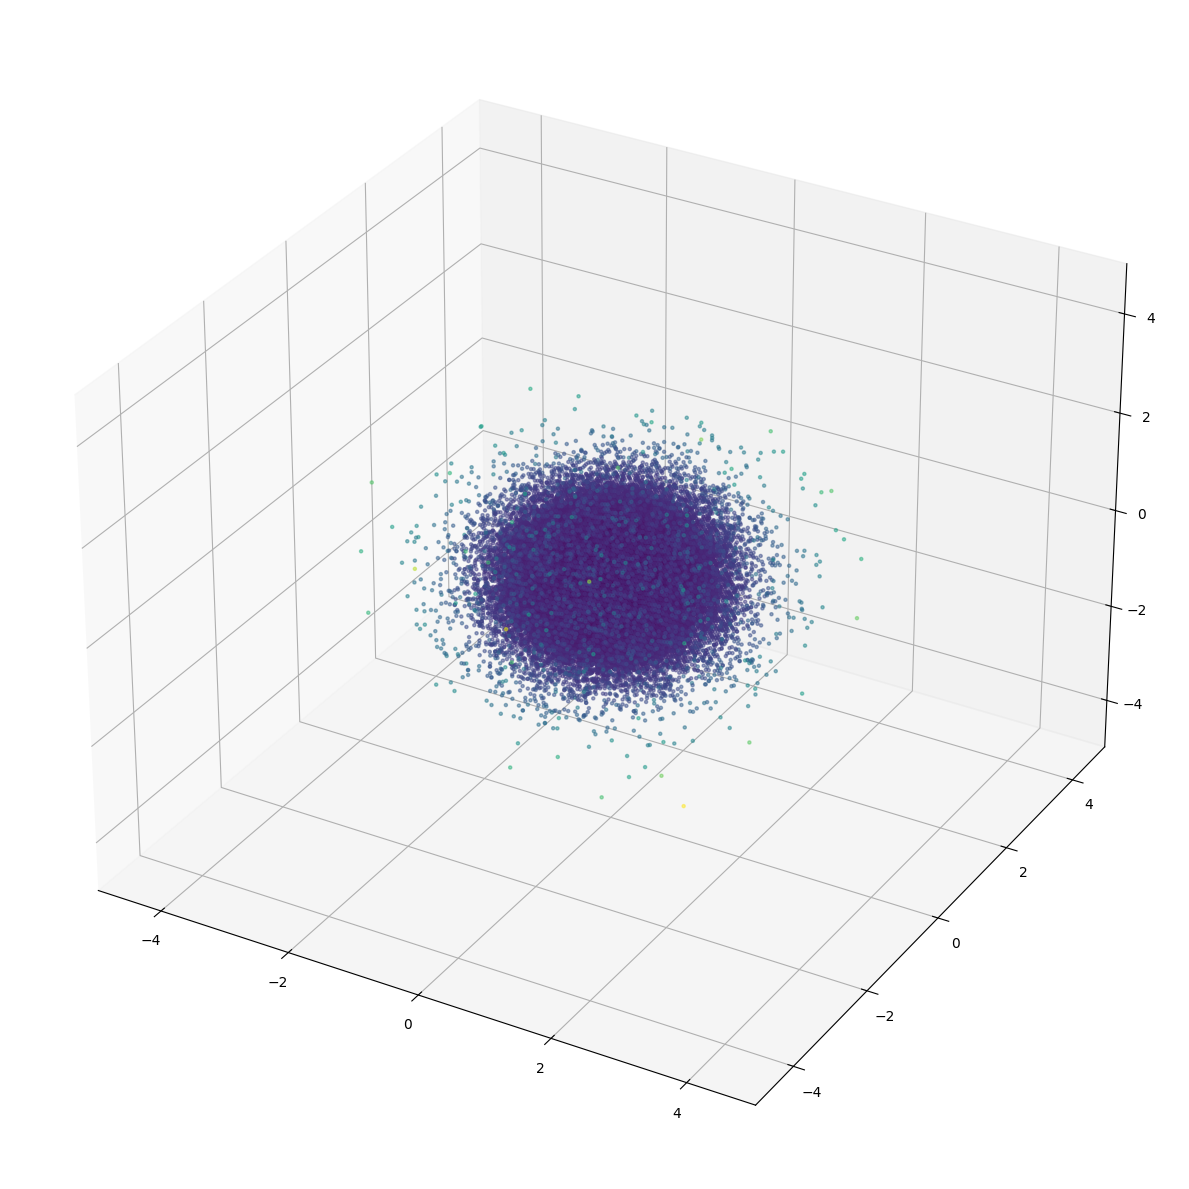


Distribution Statistics:
Total points: 1,030,301
Grid size: 101 x 101 x 101
Min probability: 0.000000e+00
Max probability: 2.022870e-03
Mean probability: 9.705901e-07


In [2]:
# Taking modulus^2 of wavefunction and normalising across the considered volume to obtain correct probability distribution
Ψ2 = np.abs(Ψ)**2
Ψ2 = Ψ2 / np.sum(Ψ2)

# Create a 3D grid of points (101 x 101 x 101) #~
n = 101
x = np.linspace(-5, 5, n) #~
y = np.linspace(-5, 5, n) #~
z = np.linspace(-5, 5, n) #~

# Create meshgrid
X, Y, Z = np.meshgrid(x, y, z)

# replace this with your actual probability distribution
prob = Ψ2

# Flatten the arrays
x_flat = X.flatten()
y_flat = Y.flatten()
z_flat = Z.flatten()
prob_flat = prob.flatten()

# take a sample, all points would take too long and look meaningless
n_samples = 200_000
sample_indices = np.random.choice(len(prob_flat), size=n_samples, p=prob_flat, replace=True)

x_sampled = x_flat[sample_indices]
y_sampled = y_flat[sample_indices]
z_sampled = z_flat[sample_indices]

# Create 3D scatter plot
fig = plt.figure(figsize=(12, 20))
ax = fig.add_subplot(111, projection='3d')

# Plot sampled points
scatter = ax.scatter(x_sampled, y_sampled, z_sampled,
                     c=(x_sampled**2 + y_sampled**2 + z_sampled**2),
                     cmap='viridis', marker='o', s=5, alpha=0.5)

#ax.set_xlabel('X axis', fontsize=12)
#ax.set_ylabel('Y axis', fontsize=12)
#ax.set_zlabel('Z axis', fontsize=12)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
#ax.set_title(f'3D Probability Distribution (sampled {n_samples} from {n**3:,} points)', fontsize=14, fontweight='bold')

# Add colorbar
# plt.colorbar(scatter, ax=ax, label='Distance from origin', shrink=0.5)

plt.tight_layout()
plt.show()

# Print statistics
print(f"\nDistribution Statistics:")
print(f"Total points: {n**3:,}")
print(f"Grid size: {n} x {n} x {n}")
print(f"Min probability: {prob_flat.min():.6e}")
print(f"Max probability: {prob_flat.max():.6e}")
print(f"Mean probability: {prob_flat.mean():.6e}")